## Practice Session
### (Clustering)

### Question 1
A dataset containing the medical records of 299 heart failure patients is provided. The patients consisted of 105 women and 194 men, and their ages range between 40 and 95 years old. All 299 patients had left ventricular systolic dysfunction and had previous heart failures. The dataset contains 13 features, which report clinical, body, and lifestyle information.

- a) Describe the statistical details (such as mean, median, standard deviation, frequency of each category in the case of  categorical variables etc.) through appropriate visualization.
- b) Perform the curation of the data, if required. (For example, filling the missing values).
- c) Perform normalization using appropriate method.
- d) Find out the optimal K-Value using any method and visualize the elbow curve.
- e) Visualize the clusters and save the cluster ID  of every patient to a csv fille.
- f) Write your analysis of the results. For example, what are the common symptoms/disorders of all the patients in a cluster.   
- Note: Last column DEATH_EVENT can be removed, it is target variable. 



In [1]:
# importing necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# Reading the dataset:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [3]:
# Top 5 records:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
# Shape of dataset:
df.shape

(299, 13)

In [5]:
# Datatypes of each features:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [6]:
# Dropping "DEATH_EVENT" column (Target Variable):
df.drop("DEATH_EVENT", axis=1, inplace=True)

In [7]:
# Statistical analysis:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000


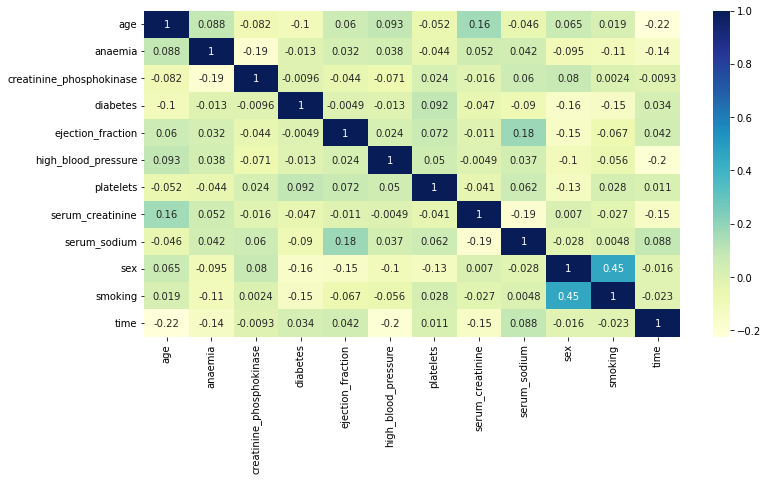

In [8]:
# Heatmap of dataset using correlation:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

- By visualizing the above heatmap, There is **no multicollinearity** present between the features.
- Only "Sex" and "Smoking" features having 45% correlation.

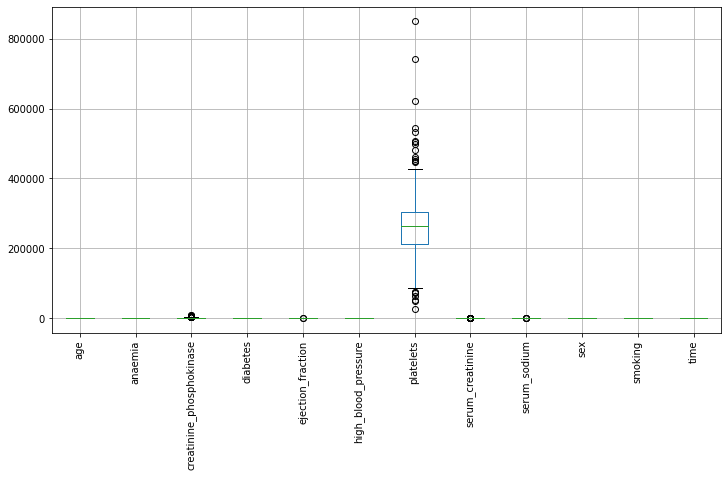

In [9]:
# Boxplot:
plt.figure(figsize=(12,6))
df.boxplot()
plt.xticks(rotation=90)
plt.show()

- The above boxplot is not clearly visible, so we will plot boxplot of each features separately. 

### Age

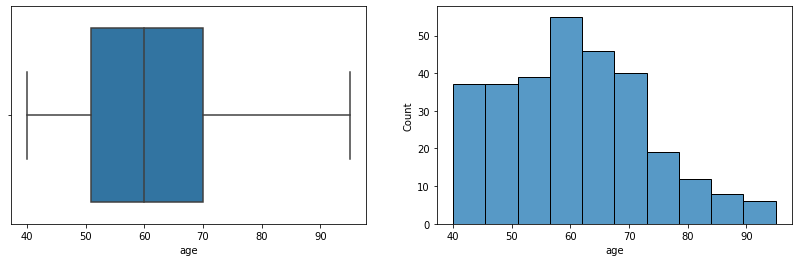

In [10]:
plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
sns.boxplot(x="age", data=df)

plt.subplot(1,2,2)
sns.histplot(data=df, x='age')
plt.xlabel("age")
plt.show()

In "age" feature we obeserved that,
- Outliers is not present

### creatinine_phosphokinase

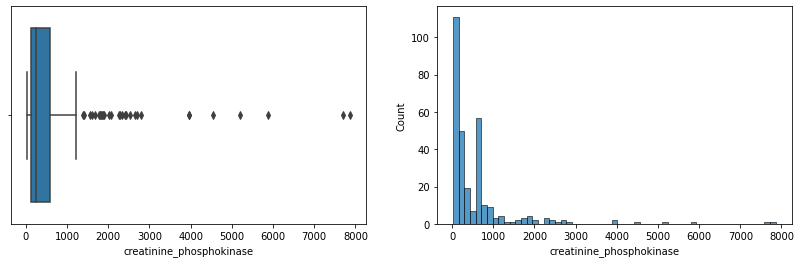

In [11]:
plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
sns.boxplot(x="creatinine_phosphokinase", data=df)

plt.subplot(1,2,2)
sns.histplot(data=df, x='creatinine_phosphokinase')
plt.xlabel("creatinine_phosphokinase")
plt.show()

In "creatinine_phosphokinase" feature we obeserved that,
- Outliers is present 
- Data is right skewed

### ejection_fraction

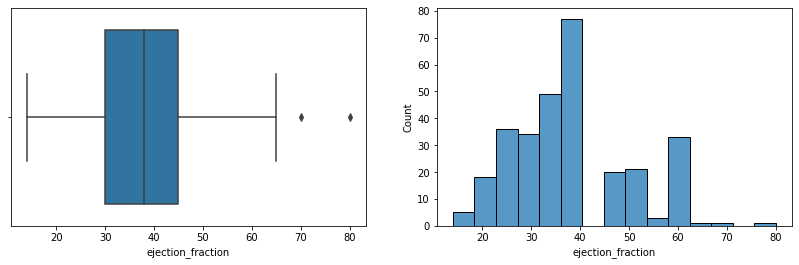

In [12]:
plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
sns.boxplot(x="ejection_fraction", data=df)

plt.subplot(1,2,2)
sns.histplot(data=df, x='ejection_fraction')
plt.xlabel("ejection_fraction")
plt.show()

In "ejection_fraction" feature we obeserved that,
- Outliers is present 
- Data is right skewed

### platelets

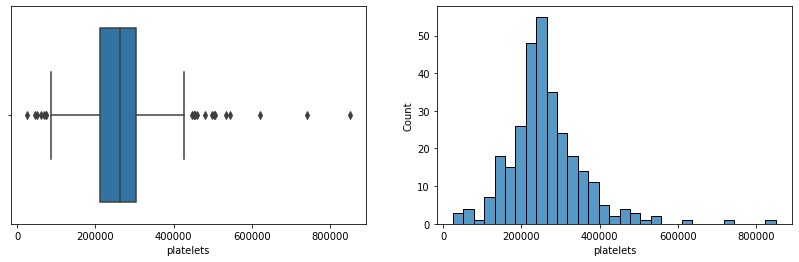

In [13]:
plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
sns.boxplot(x="platelets", data=df)

plt.subplot(1,2,2)
sns.histplot(data=df, x='platelets')
plt.xlabel("platelets")
plt.show()

In "platelets" feature we obeserved that,
- Outliers is present.
- Data is right skewed.

### serum_creatinine

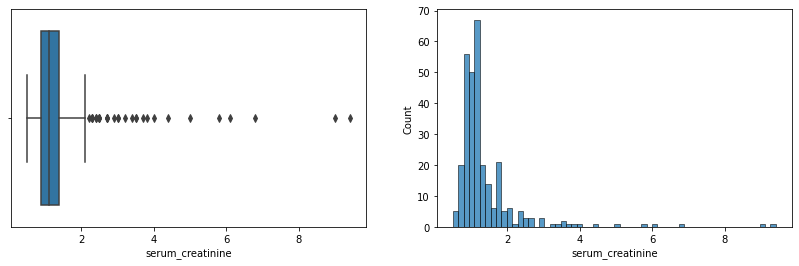

In [14]:
plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
sns.boxplot(x="serum_creatinine", data=df)

plt.subplot(1,2,2)
sns.histplot(data=df, x='serum_creatinine')
plt.xlabel("serum_creatinine")
plt.show()

In "serum_creatinine" feature we obeserved that,
- Outliers is present.
- Data is right skewed.

### serum_sodium

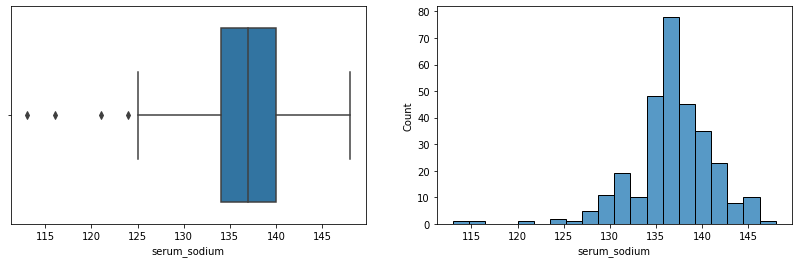

In [15]:
plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
sns.boxplot(x="serum_sodium", data=df)

plt.subplot(1,2,2)
sns.histplot(data=df, x='serum_sodium')
plt.xlabel("serum_sodium")
plt.show()

In "serum_sodium" feature we obeserved that,
- Outliers is present.
- Data is left skewed.

In [16]:
# Cheaking any NaN values present in the dataset:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
dtype: int64

- There is **no missing values** present in our dataset.

In [17]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


- As we can see that, the scale of each feature is different, so we need to scale all the values in between certain range. 
- here we are using **Standardization** 

In [18]:
# standardization
def standardization(dataset):
    data = dataset.copy()
    dtypes = list(zip(data.dtypes.index, map(str, data.dtypes)))
    
    for column, dtype in dtypes:
        data[column] -= data[column].mean()
        data[column] /= data[column].std()
    return data

In [19]:
scaler = standardization(df)
scaler.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1.190949,-0.869647,0.000165,-0.846161,-1.527998,1.356997,1.678834e-02,0.489237,-1.501519,0.734457,-0.686531,-1.626775
1,-0.490457,-0.869647,7.502063,-0.846161,-0.007065,-0.734457,7.523047e-09,-0.284076,-0.141739,0.734457,-0.686531,-1.601007
2,0.350246,-0.869647,-0.449186,-0.846161,-1.527998,-0.734457,-1.036336e+00,-0.090748,-1.728149,0.734457,1.451727,-1.588122
3,-0.910808,1.146046,-0.485257,-0.846161,-1.527998,-0.734457,-5.455595e-01,0.489237,0.084892,0.734457,-0.686531,-1.588122
4,0.350246,1.146046,-0.434757,1.177856,-1.527998,-0.734457,6.507077e-01,1.262550,-4.674340,-1.356997,-0.686531,-1.575238


Now we will check that applying clustering is suitable for this data or not by using **Hopkins Statistics.**

This is called as **Assessing Clustering Tendency.**

### Hopkins Statistic (Statistical Method)

- Hopkins statistic is used to assess the clustering tendency of a dataset by measuring the probability that a given dataset is generated by a uniform data distribution.
- In other words it tests the spatial randomness of the data.

In [20]:
def hopkins(x, n):
    d = len(x)
    columns = x.shape[1]

    for i in range(columns):
        if np.max(x[:, i]) == np.min(x[:, i]) == 0:
            pass
        else:
            x[:, i] = (x[:, i] - np.min(x[:, i])) / (np.max(x[:, i]) - np.min(x[:, i]))

    s = np.random.choice(d, n, replace=False)
    nns = NearestNeighbors(n_neighbors=1).fit(x)

    u, w = 0, 0
    for i in s:
        ran_point = [np.random.uniform(size=columns)]
        u += nns.kneighbors(ran_point)[0][0][0]
        w += nns.kneighbors([x[i]], 2)[0][0][1]

    return u / (u + w)

In [21]:
# Converting the data frame to a numpy array:
scaler_npy = scaler.to_numpy(copy=True)

In [22]:
# Hopkins statistic:
hs = hopkins(scaler_npy, scaler_npy.shape[0])
print("Hopkins statistic :", hs)

Hopkins statistic : 0.7708419951109675


- **As our Hopkins Statistics value is greater than 0.5, we can able to use clustering algorithm on this dataset.**

In [23]:
# Kmean Model building for different value of k (1 to 10):
kmean_model = [KMeans(n_clusters=k, random_state=8).fit(scaler) for k in range(1, 11)]

C:\Users\ganes\anaconda3\envs\project\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [24]:
# Inertia of each model for different value of k:
inertias = [model.inertia_ for model in kmean_model]
print(inertias)

[3575.999999999998, 3190.4145389646765, 2962.350122009445, 2793.2410395593674, 2637.567802376657, 2478.902605410082, 2387.2778544573225, 2283.8772425393263, 2200.6367856352012, 2127.4345358651694]


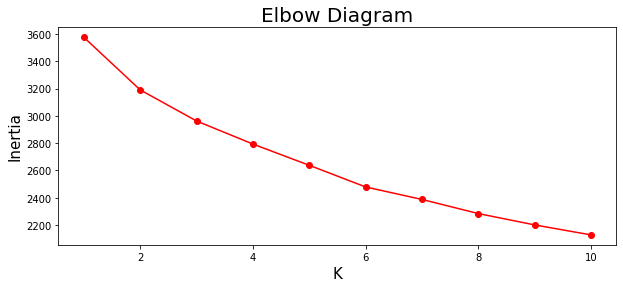

In [25]:
# Elbow diagram:
plt.figure(figsize=(10, 4))
plt.plot(range(1, 11), inertias, "ro-")
plt.title("Elbow Diagram", fontsize=20)
plt.xlabel("K", fontsize=15)
plt.ylabel("Inertia", fontsize=15)
plt.show()

- by seeing above elbow diagram, the best clusters we can choose is **k = 3**.

In [26]:
# KMeans model building for k=3:
model = KMeans(n_clusters=3, random_state=8)
model.fit_predict(scaler)

array([0, 0, 2, 0, 1, 2, 0, 2, 1, 2, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       2, 0, 1, 2, 1, 2, 0, 2, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1, 2, 0,
       1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 1, 0, 2, 2, 2, 2, 0, 1, 2, 0, 1, 2,
       1, 2, 1, 0, 2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 1, 2, 1, 0, 1, 0, 0, 0,
       0, 0, 2, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 2, 2, 1, 1, 0, 0, 2, 2,
       2, 2, 0, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 1, 1, 2, 2, 2, 0, 0, 0, 1, 0, 2, 2,
       1, 0, 1, 2, 0, 2, 0, 2, 2, 1, 0, 1, 2, 0, 1, 1, 2, 2, 2, 0, 2, 2,
       2, 1, 0, 2, 0, 2, 2, 0, 2, 0, 1, 1, 1, 1, 0, 1, 0, 2, 0, 0, 1, 1,
       1, 2, 0, 0, 0, 2, 2, 1, 1, 0, 1, 1, 2, 2, 2, 1, 0, 0, 1, 1, 0, 1,
       0, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 2, 0, 2, 2, 0, 0, 0, 1, 2, 1, 2,
       2, 1, 0, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 2, 1, 0, 0, 2, 0, 1, 0, 1,
       0, 2, 2, 0, 1, 0, 2, 1, 1, 0, 2, 1, 1, 0, 1, 1, 0, 2, 2, 2, 0, 0,
       0, 1, 1, 1, 1, 0, 2, 2, 2, 1, 1, 2, 2])

In [27]:
# Centroids:
print(model.cluster_centers_)

[[ 0.07303393  0.01962951  0.09275976 -0.01274219 -0.11061427 -0.03730575
  -0.18403236  0.050268   -0.04619841  0.73445691 -0.68653097 -0.02622431]
 [-0.08878764  0.12860116 -0.10827561  0.2140384   0.20135925  0.14196169
   0.16978807 -0.00945797  0.03740713 -1.35699658 -0.60507353  0.0211803 ]
 [ 0.02036132 -0.16853621  0.02073308 -0.23015575 -0.10717463 -0.12066078
   0.01025602 -0.0449375   0.00852705  0.73445691  1.45172695  0.00490161]]


In [28]:
# Inertia:
print("Inertia :", model.inertia_)

Inertia : 2962.350122009445


In [29]:
# Labels:
print(model.labels_)

[0 0 2 0 1 2 0 2 1 2 2 2 0 0 1 0 0 0 1 1 1 1 2 0 1 2 1 2 0 2 0 0 1 1 0 0 0
 1 0 1 2 1 2 0 1 2 0 2 0 1 0 1 1 1 1 0 2 2 2 2 0 1 2 0 1 2 1 2 1 0 2 2 2 2
 2 2 1 0 2 1 1 2 1 0 1 0 0 0 0 0 2 0 1 0 1 0 0 1 1 1 0 0 2 2 1 1 0 0 2 2 2
 2 0 1 0 1 1 1 1 1 2 1 1 1 0 1 1 1 2 0 2 0 1 2 2 0 1 0 1 0 0 1 1 1 2 2 2 0
 0 0 1 0 2 2 1 0 1 2 0 2 0 2 2 1 0 1 2 0 1 1 2 2 2 0 2 2 2 1 0 2 0 2 2 0 2
 0 1 1 1 1 0 1 0 2 0 0 1 1 1 2 0 0 0 2 2 1 1 0 1 1 2 2 2 1 0 0 1 1 0 1 0 2
 2 0 0 1 2 0 1 1 1 2 0 2 2 0 0 0 1 2 1 2 2 1 0 0 0 0 2 1 1 1 0 1 0 2 1 0 0
 2 0 1 0 1 0 2 2 0 1 0 2 1 1 0 2 1 1 0 1 1 0 2 2 2 0 0 0 1 1 1 1 0 2 2 2 1
 1 2 2]


Now we will visualizing the clusters, first we have to perform Principal component analysis on our data because the numbers of attributes is 12.

In [30]:
# Principal Component Analysis (PCA):
pca = PCA(n_components=2)
pcs = pca.fit_transform(scaler)

In [31]:
# Shape after PCA:
pcs.shape

(299, 2)

In [32]:
# Labels:
labels = model.labels_

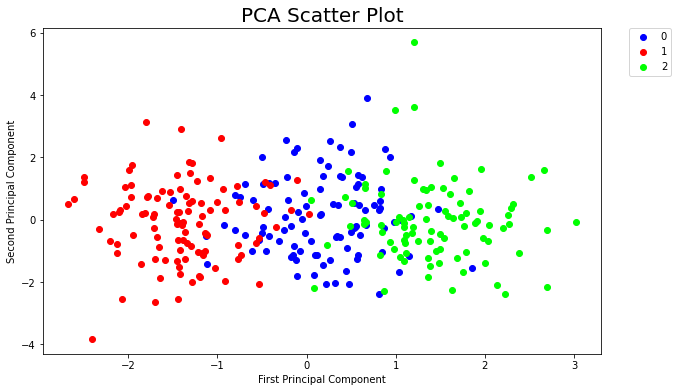

In [33]:
# Plotting the clustres:
colors = ['blue', 'red', 'lime']
clus_ids = np.unique(labels)
plt.figure(figsize=(10,6))

k = 3
for i in range(k):
    x = pcs[:, 0][labels == i]
    y = pcs[:, 1][labels == i]
    plt.scatter(x, y, c=colors[i])
    
plt.legend(clus_ids, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("PCA Scatter Plot", fontsize=20)
plt.show()

- Visualize the clusters and save the cluster ID of every patient to a csv fille.

- Write your analysis of the results. For example, what are the common symptoms/disorders of all the patients in a cluster.

In [34]:
# Creating new column Cluster_ID to store Cluster ID of respective records:
df["Cluster_ID"] = model.labels_

In [35]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Cluster_ID
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,0
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,2
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [36]:
# Saving Cluster ID of every patient to a csv file:
df.to_csv("Cluster_ID_NewFile.csv", index=False)

In [37]:
# Opening Cluster_ID_NewFile.csv file:
df_new = pd.read_csv("Cluster_ID_NewFile.csv")
df_new.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Cluster_ID
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,0
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,2
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [38]:
# Splitting data for each cluster's:
cluster_0 = df_new[df_new["Cluster_ID"] == 0]
cluster_1 = df_new[df_new["Cluster_ID"] == 1]
cluster_2 = df_new[df_new["Cluster_ID"] == 2]

## Statistical Analysis of each Cluster's

In [39]:
cluster_0.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Cluster_ID
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.0,102.0,102.000000,102.0
mean,61.702618,0.441176,671.843137,0.411765,36.774510,0.333333,245358.884412,1.445882,136.421569,1.0,0.0,128.225490,0.0
std,12.917774,0.498980,1187.625301,0.494583,11.299616,0.473732,85491.473344,0.925340,3.842020,0.0,0.0,78.093103,0.0
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.700000,126.000000,1.0,0.0,4.000000,0.0
25%,51.500000,0.000000,115.000000,0.000000,26.250000,0.000000,199250.000000,1.000000,134.000000,1.0,0.0,75.000000,0.0
50%,60.000000,0.000000,314.000000,0.000000,38.000000,0.000000,243000.000000,1.100000,136.500000,1.0,0.0,114.000000,0.0
75%,70.000000,1.000000,582.000000,1.000000,43.750000,1.000000,278250.000000,1.700000,139.000000,1.0,0.0,204.000000,0.0
max,95.000000,1.000000,7861.000000,1.000000,60.000000,1.000000,504000.000000,6.100000,148.000000,1.0,0.0,258.000000,0.0


In [40]:
cluster_1.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Cluster_ID
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.0,105.000000,105.000000,105.0
mean,59.777781,0.495238,476.780952,0.523810,40.466667,0.419048,279964.021619,1.384095,136.790476,0.0,0.038095,131.904762,1.0
std,11.240919,0.502375,611.364190,0.501828,12.728728,0.495770,102108.749558,1.118633,4.904267,0.0,0.192344,77.625893,0.0
min,40.000000,0.000000,52.000000,0.000000,15.000000,0.000000,62000.000000,0.500000,116.000000,0.0,0.000000,8.000000,1.0
25%,50.000000,0.000000,124.000000,0.000000,30.000000,0.000000,223000.000000,0.900000,135.000000,0.0,0.000000,75.000000,1.0
50%,60.000000,0.000000,250.000000,1.000000,38.000000,0.000000,263358.030000,1.000000,137.000000,0.0,0.000000,109.000000,1.0
75%,66.000000,1.000000,582.000000,1.000000,50.000000,1.000000,319000.000000,1.400000,140.000000,0.0,0.000000,205.000000,1.0
max,95.000000,1.000000,3964.000000,1.000000,80.000000,1.000000,742000.000000,9.000000,146.000000,0.0,1.000000,278.000000,1.0


In [41]:
cluster_2.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Cluster_ID
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.0,92.0,92.000000,92.0
mean,61.076087,0.347826,601.956522,0.304348,36.815217,0.293478,264361.111630,1.347391,136.663043,1.0,1.0,130.641304,2.0
std,11.468288,0.478890,1033.529735,0.462652,11.031353,0.457851,103029.106747,1.057767,4.450650,0.0,0.0,77.869231,0.0
min,40.000000,0.000000,47.000000,0.000000,17.000000,0.000000,51000.000000,0.600000,113.000000,1.0,1.0,7.000000,2.0
25%,52.000000,0.000000,121.000000,0.000000,30.000000,0.000000,204000.000000,0.900000,135.000000,1.0,1.0,71.750000,2.0
50%,60.000000,0.000000,222.000000,0.000000,35.000000,0.000000,263358.030000,1.100000,137.000000,1.0,1.0,119.500000,2.0
75%,70.000000,1.000000,582.000000,1.000000,40.000000,1.000000,305250.000000,1.300000,139.000000,1.0,1.0,200.250000,2.0
max,90.000000,1.000000,5882.000000,1.000000,62.000000,1.000000,850000.000000,9.400000,145.000000,1.0,1.0,285.000000,2.0


## Plotting Box plot of each features for different Cluster's

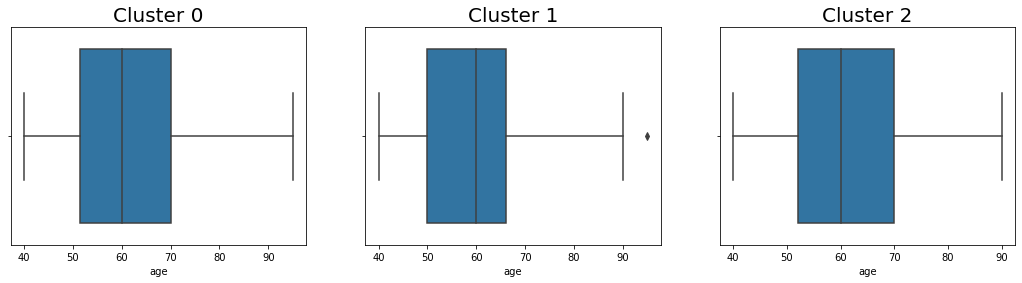

In [42]:
# Boxplot of "age" feature of different clusters: 
plt.figure(figsize=(18,4))

plt.subplot(1,3,1)
sns.boxplot(data=cluster_0, x="age")
plt.title("Cluster 0", fontsize=20)

plt.subplot(1,3,2)
sns.boxplot(data=cluster_1, x="age")
plt.title("Cluster 1", fontsize=20)

plt.subplot(1,3,3)
sns.boxplot(data=cluster_2, x="age")
plt.title("Cluster 2", fontsize=20)

plt.show()

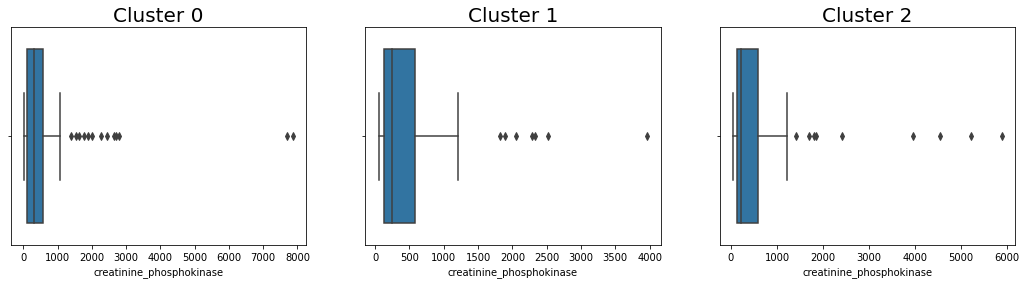

In [43]:
# Boxplot of "creatinine_phosphokinase" feature of different clusters: 
plt.figure(figsize=(18,4))

plt.subplot(1,3,1)
sns.boxplot(data=cluster_0, x="creatinine_phosphokinase")
plt.title("Cluster 0", fontsize=20)

plt.subplot(1,3,2)
sns.boxplot(data=cluster_1, x="creatinine_phosphokinase")
plt.title("Cluster 1", fontsize=20)

plt.subplot(1,3,3)
sns.boxplot(data=cluster_2, x="creatinine_phosphokinase")
plt.title("Cluster 2", fontsize=20)

plt.show()

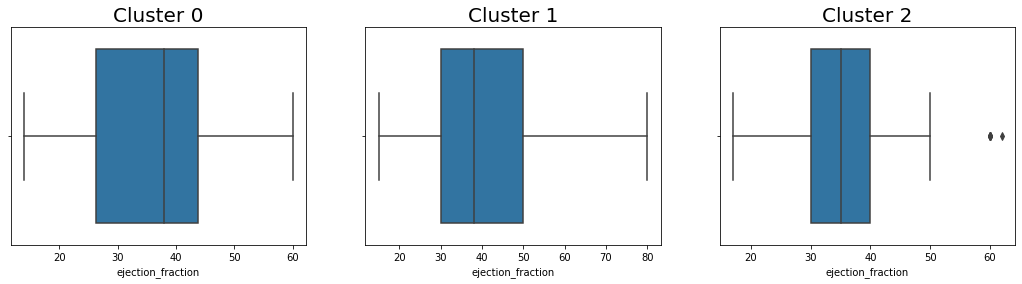

In [44]:
# Boxplot of "ejection_fraction" feature for different clusters: 
plt.figure(figsize=(18,4))

plt.subplot(1,3,1)
sns.boxplot(data=cluster_0, x="ejection_fraction")
plt.title("Cluster 0", fontsize=20)

plt.subplot(1,3,2)
sns.boxplot(data=cluster_1, x="ejection_fraction")
plt.title("Cluster 1", fontsize=20)

plt.subplot(1,3,3)
sns.boxplot(data=cluster_2, x="ejection_fraction")
plt.title("Cluster 2", fontsize=20)

plt.show()

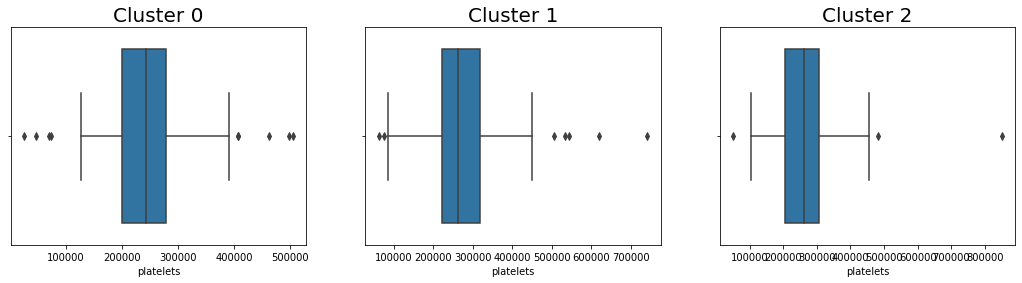

In [45]:
# Boxplot of "platelets" feature for different clusters: 
plt.figure(figsize=(18,4))

plt.subplot(1,3,1)
sns.boxplot(data=cluster_0, x="platelets")
plt.title("Cluster 0", fontsize=20)

plt.subplot(1,3,2)
sns.boxplot(data=cluster_1, x="platelets")
plt.title("Cluster 1", fontsize=20)

plt.subplot(1,3,3)
sns.boxplot(data=cluster_2, x="platelets")
plt.title("Cluster 2", fontsize=20)

plt.show()

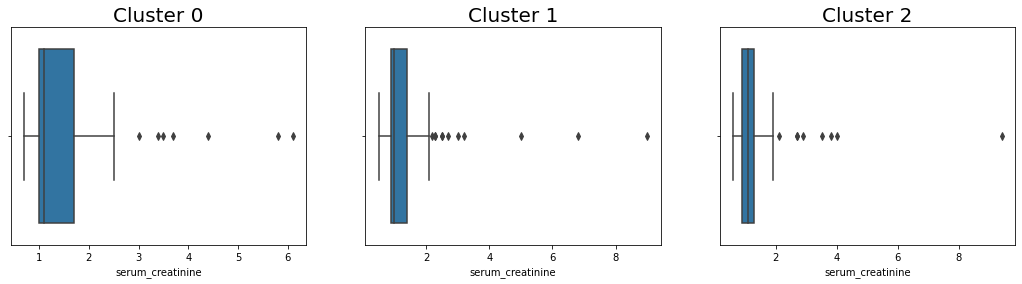

In [46]:
# Boxplot of "serum_creatinine" feature for different clusters: 
plt.figure(figsize=(18,4))

plt.subplot(1,3,1)
sns.boxplot(data=cluster_0, x="serum_creatinine")
plt.title("Cluster 0", fontsize=20)

plt.subplot(1,3,2)
sns.boxplot(data=cluster_1, x="serum_creatinine")
plt.title("Cluster 1", fontsize=20)

plt.subplot(1,3,3)
sns.boxplot(data=cluster_2, x="serum_creatinine")
plt.title("Cluster 2", fontsize=20)

plt.show()

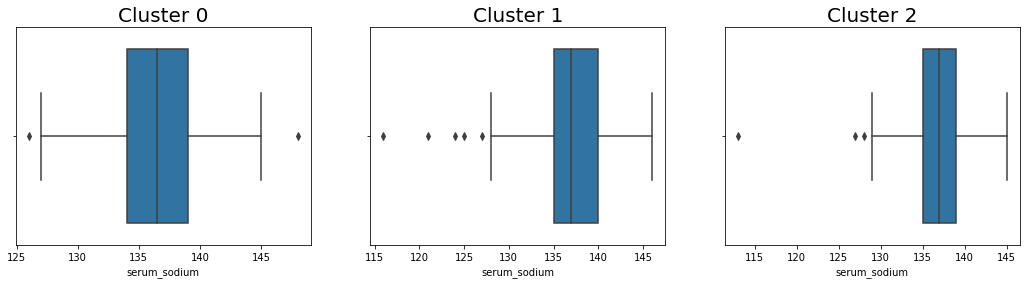

In [47]:
# Boxplot of "serum_sodium" feature for different clusters: 
plt.figure(figsize=(18,4))

plt.subplot(1,3,1)
sns.boxplot(data=cluster_0, x="serum_sodium")
plt.title("Cluster 0", fontsize=20)

plt.subplot(1,3,2)
sns.boxplot(data=cluster_1, x="serum_sodium")
plt.title("Cluster 1", fontsize=20)

plt.subplot(1,3,3)
sns.boxplot(data=cluster_2, x="serum_sodium")
plt.title("Cluster 2", fontsize=20)

plt.show()

### creatinine_phosphokinase feature:

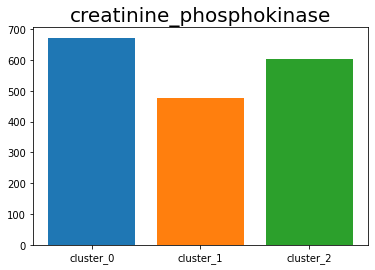

In [48]:
# creatinine_phosphokinase mean for each clusters (0,1,2):
plt.bar(1,cluster_0["creatinine_phosphokinase"].mean())
plt.bar(2,cluster_1["creatinine_phosphokinase"].mean())
plt.bar(3,cluster_2["creatinine_phosphokinase"].mean())
plt.title("creatinine_phosphokinase", fontsize=20)
plt.xticks(ticks=[1,2,3], labels=['cluster_0','cluster_1','cluster_2'])
plt.show()

### ejection_fraction feature:

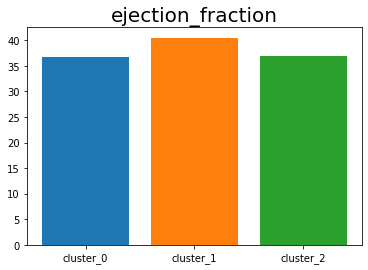

In [49]:
# ejection_fraction mean for each clusters (0,1,2):
plt.bar(1,cluster_0["ejection_fraction"].mean())
plt.bar(2,cluster_1["ejection_fraction"].mean())
plt.bar(3,cluster_2["ejection_fraction"].mean())
plt.title("ejection_fraction", fontsize=20)
plt.xticks(ticks=[1,2,3], labels=['cluster_0','cluster_1','cluster_2'])
plt.show()

### platelets feature:

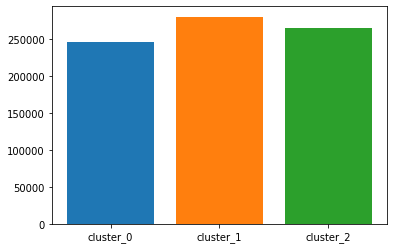

In [50]:
# platelets mean for each clusters (0,1,2):
plt.bar(1,cluster_0["platelets"].mean())
plt.bar(2,cluster_1["platelets"].mean())
plt.bar(3,cluster_2["platelets"].mean())
plt.xticks(ticks=[1,2,3], labels=['cluster_0','cluster_1','cluster_2'])
plt.show()

### serum_creatinine feature:

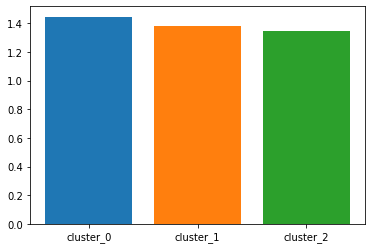

In [51]:
# serum_creatinine mean for each clusters (0,1,2):
plt.bar(1,cluster_0["serum_creatinine"].mean())
plt.bar(2,cluster_1["serum_creatinine"].mean())
plt.bar(3,cluster_2["serum_creatinine"].mean())
plt.xticks(ticks=[1,2,3], labels=['cluster_0','cluster_1','cluster_2'])
plt.show()

### serum_sodium feature:

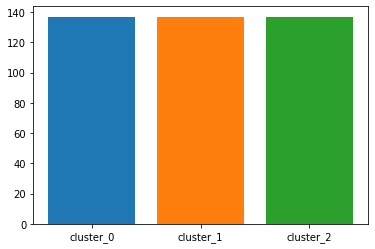

In [52]:
# serum_sodium mean for each clusters (0,1,2):
plt.bar(1,cluster_0["serum_sodium"].mean())
plt.bar(2,cluster_1["serum_sodium"].mean())
plt.bar(3,cluster_2["serum_sodium"].mean())
plt.xticks(ticks=[1,2,3], labels=['cluster_0','cluster_1','cluster_2'])
plt.show()

### anaemia feature:

In [53]:
# Cluster_0
cluster_0["anaemia"].value_counts()

0    57
1    45
Name: anaemia, dtype: int64

In [54]:
# Cluster_1
cluster_1["anaemia"].value_counts()

0    53
1    52
Name: anaemia, dtype: int64

In [55]:
# Cluster_2
cluster_2["anaemia"].value_counts()

0    60
1    32
Name: anaemia, dtype: int64

### diabetes feature:

In [56]:
# Cluster_0
cluster_0["diabetes"].value_counts()

0    60
1    42
Name: diabetes, dtype: int64

In [57]:
# Cluster_1
cluster_1["diabetes"].value_counts()

1    55
0    50
Name: diabetes, dtype: int64

In [58]:
# Cluster_2
cluster_2["diabetes"].value_counts()

0    64
1    28
Name: diabetes, dtype: int64

### high_blood_pressure feature:

In [59]:
# Cluster_0
cluster_0["high_blood_pressure"].value_counts()

0    68
1    34
Name: high_blood_pressure, dtype: int64

In [60]:
# Cluster_1
cluster_1["high_blood_pressure"].value_counts()

0    61
1    44
Name: high_blood_pressure, dtype: int64

In [61]:
# Cluster_2
cluster_2["high_blood_pressure"].value_counts()

0    65
1    27
Name: high_blood_pressure, dtype: int64

### Sex feature:

In [62]:
# Cluster_0
print(cluster_0["sex"].value_counts())

1    102
Name: sex, dtype: int64


In [63]:
# Cluster_1
print(cluster_1["sex"].value_counts())

0    105
Name: sex, dtype: int64


In [64]:
# Cluster_2
print(cluster_2["sex"].value_counts())

1    92
Name: sex, dtype: int64


### Smokers Features:

In [65]:
print("Percentage of smokers,")
print("Cluster 0 :", len(cluster_0[cluster_0["smoking"] == 1])/len(cluster_0))
print("Cluster 1 :", len(cluster_1[cluster_1["smoking"] == 1])/len(cluster_1))
print("Cluster 2 :", len(cluster_2[cluster_2["smoking"] == 1])/len(cluster_2))

Percentage of smokers,
Cluster 0 : 0.0
Cluster 1 : 0.0380952380952381
Cluster 2 : 1.0


# Analysis:

- In **Cluster 2**, all the patients is **SMOKERS.**

- In **Cluster 1**, all the patients are **FEMALE.**
- In **Cluster 0** & **Cluster 2**, all the patients are **MALE.**